In [1]:
from datasets import load_dataset
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import adjustText
import ast
import matplotlib.ticker as ticker

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
dataframe = dataset['train'].to_pandas()

In [3]:
def country_corrected(country):
    if country == "Sudan":
        country = "United States"
    return country
dataframe['job_country'] = dataframe['job_country'].apply(country_corrected)

In [4]:
median_salaries = dataframe.copy()
median_salaries = median_salaries.groupby('job_title_short').agg(salary=('salary_year_avg','median'),job_openings=('job_title_short','count')).sort_values(by='salary',ascending=False)

/tmp/ipykernel_170602/2316358536.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, median_salaries['salary'][i], f"{text} jobs", ha='center', fontsize=8)


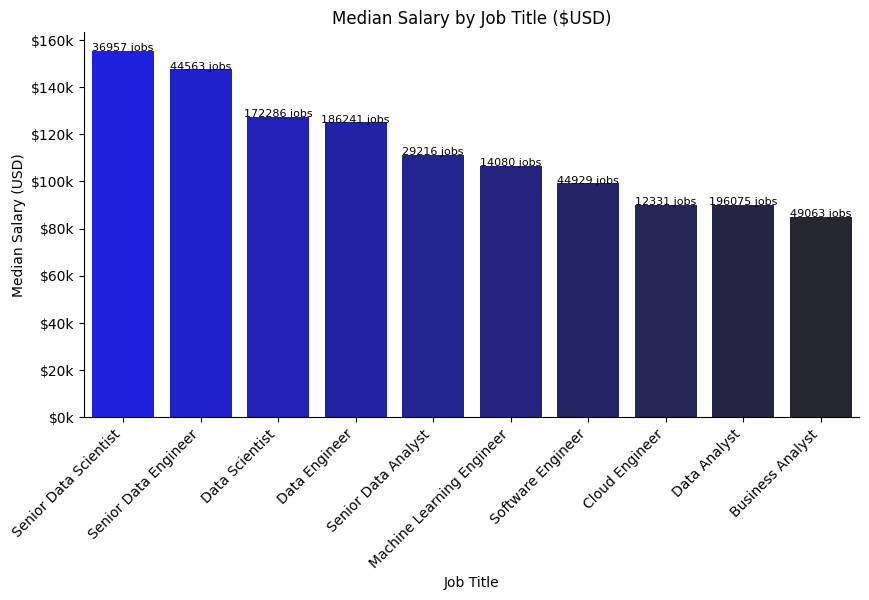

In [5]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=median_salaries,x='job_title_short',y='salary',hue='job_title_short',palette='dark:blue_r',legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Median Salary by Job Title ($USD)')
plt.ylabel('Median Salary (USD)')
plt.xlabel('Job Title')
sns.despine()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}k'))
for i, text in enumerate(median_salaries['job_openings']):
    ax.text(i, median_salaries['salary'][i], f"{text} jobs", ha='center', fontsize=8)

plt.show()

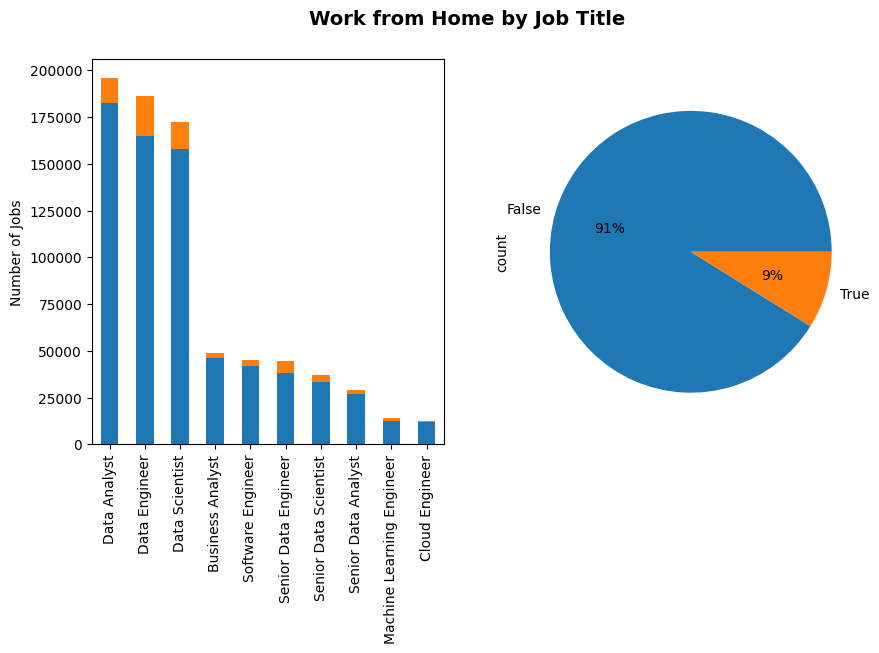

In [6]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.suptitle('Work from Home by Job Title',fontweight='bold',fontsize=14)
dataframe.pivot_table(index='job_title_short',columns='job_work_from_home',aggfunc='size').sort_values(by=False,ascending=False).plot(kind='bar',stacked=True,ax=ax[0],legend=False)
dataframe['job_work_from_home'].value_counts().plot(kind='pie',autopct="%0.0f%%",ax=ax[1])
ax[0].set_ylabel('Number of Jobs')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.show()

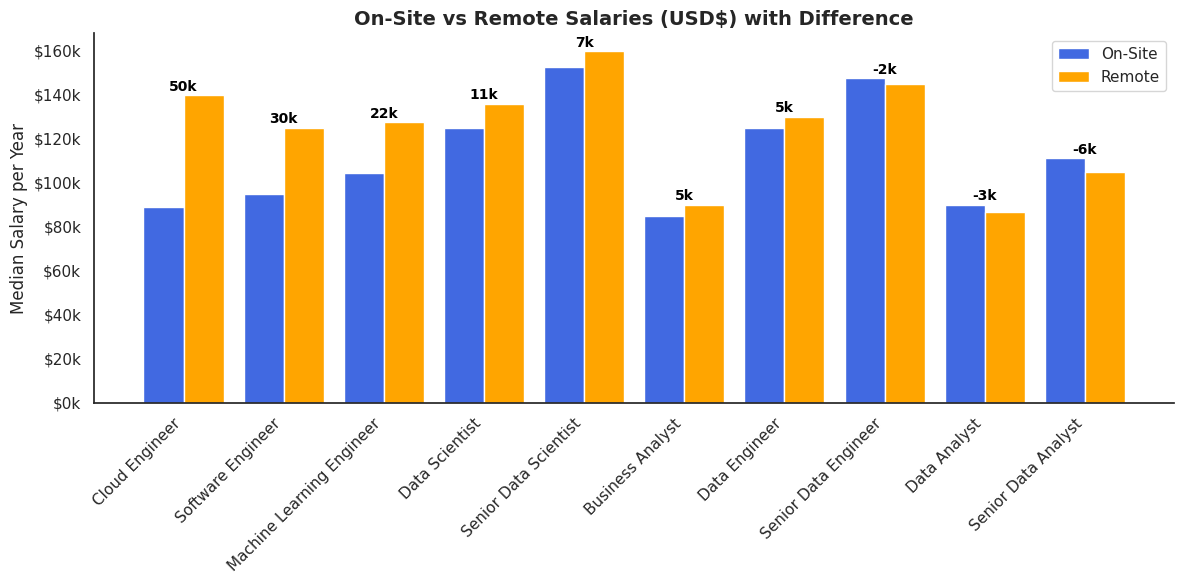

In [7]:
onsite_vs_remote_salary_difference = dataframe.copy()
onsite_vs_remote_salary_difference = onsite_vs_remote_salary_difference.pivot_table(index='job_title_short',columns='job_work_from_home',values='salary_year_avg',aggfunc='median')
onsite_vs_remote_salary_difference['on_site'] = onsite_vs_remote_salary_difference[False]
onsite_vs_remote_salary_difference['remote'] = onsite_vs_remote_salary_difference[True]
onsite_vs_remote_salary_difference.drop(columns=[False,True],inplace=True)
onsite_vs_remote_salary_difference['difference'] = onsite_vs_remote_salary_difference['remote'] - onsite_vs_remote_salary_difference['on_site']
onsite_vs_remote_salary_difference = onsite_vs_remote_salary_difference.sort_values(by='difference',ascending=False)


sorted_df = onsite_vs_remote_salary_difference.sort_values(by='difference', ascending=False)

sns.set_theme(context='notebook',style='white')


x = np.arange(len(sorted_df))  
width = 0.4  
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, sorted_df['on_site'], width, label='On-Site', color='royalblue')
bars2 = ax.bar(x + width/2, sorted_df['remote'], width, label='Remote', color='orange')

plt.title('On-Site vs Remote Salaries (USD$) with Difference', fontweight='bold', fontsize=14)
plt.xticks(x, sorted_df.index, rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Median Salary per Year')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${int(x/1000)}k"))
for i, text in enumerate(sorted_df['difference']):
    ax.text(x[i], max(sorted_df['on_site'].iloc[i], sorted_df['remote'].iloc[i]) + 2000,
            f"{int(text/1000)}k", ha='center', fontsize=10, fontweight='bold', color='black')

plt.legend()
plt.tight_layout()
sns.despine()
plt.show()


/tmp/ipykernel_170602/2776553981.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, top_10_countries_salarias['salary'][i], f"{text} jobs", ha='center', fontsize=8)


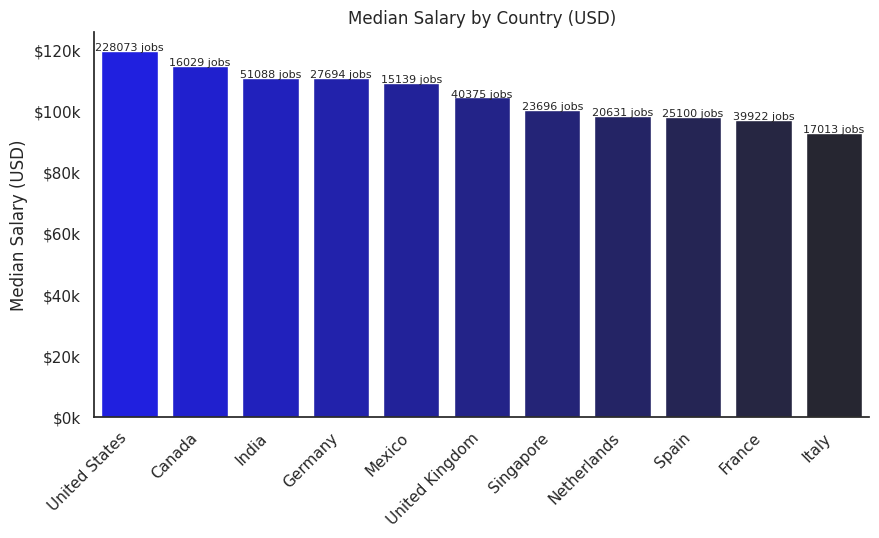

In [8]:
top_10_countries_salarias = dataframe.copy()
top_10_countries_salarias = top_10_countries_salarias.groupby('job_country').agg(salary=('salary_year_avg','median'),job_openings=('job_country','count')).sort_values(by='salary',ascending=False)
top_10_countries_salarias = top_10_countries_salarias.sort_values(by='job_openings',ascending=False).head(11)
top_10_countries_salarias.sort_values(by='salary',ascending=False,inplace=True)
# top_10_countries_salarias = top_10_countries_salarias[1:]

fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(context='notebook',style='whitegrid')
sns.barplot(data=top_10_countries_salarias,x='job_country',y='salary',hue='job_country',palette='dark:blue_r',legend=False)
sns.despine()
plt.xticks(rotation=45, ha='right')
plt.title('Median Salary by Country (USD)')
plt.ylabel('Median Salary (USD)')
plt.xlabel('')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}k'))
for i, text in enumerate(top_10_countries_salarias['job_openings']):
    ax.text(i, top_10_countries_salarias['salary'][i], f"{text} jobs", ha='center', fontsize=8)

/tmp/ipykernel_170602/354771877.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_170602/354771877.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].text(i,top_10_recruiting_platform['job_opening'][i],f"{text} jobs",ha='center',fontsize=8,rotation=45)


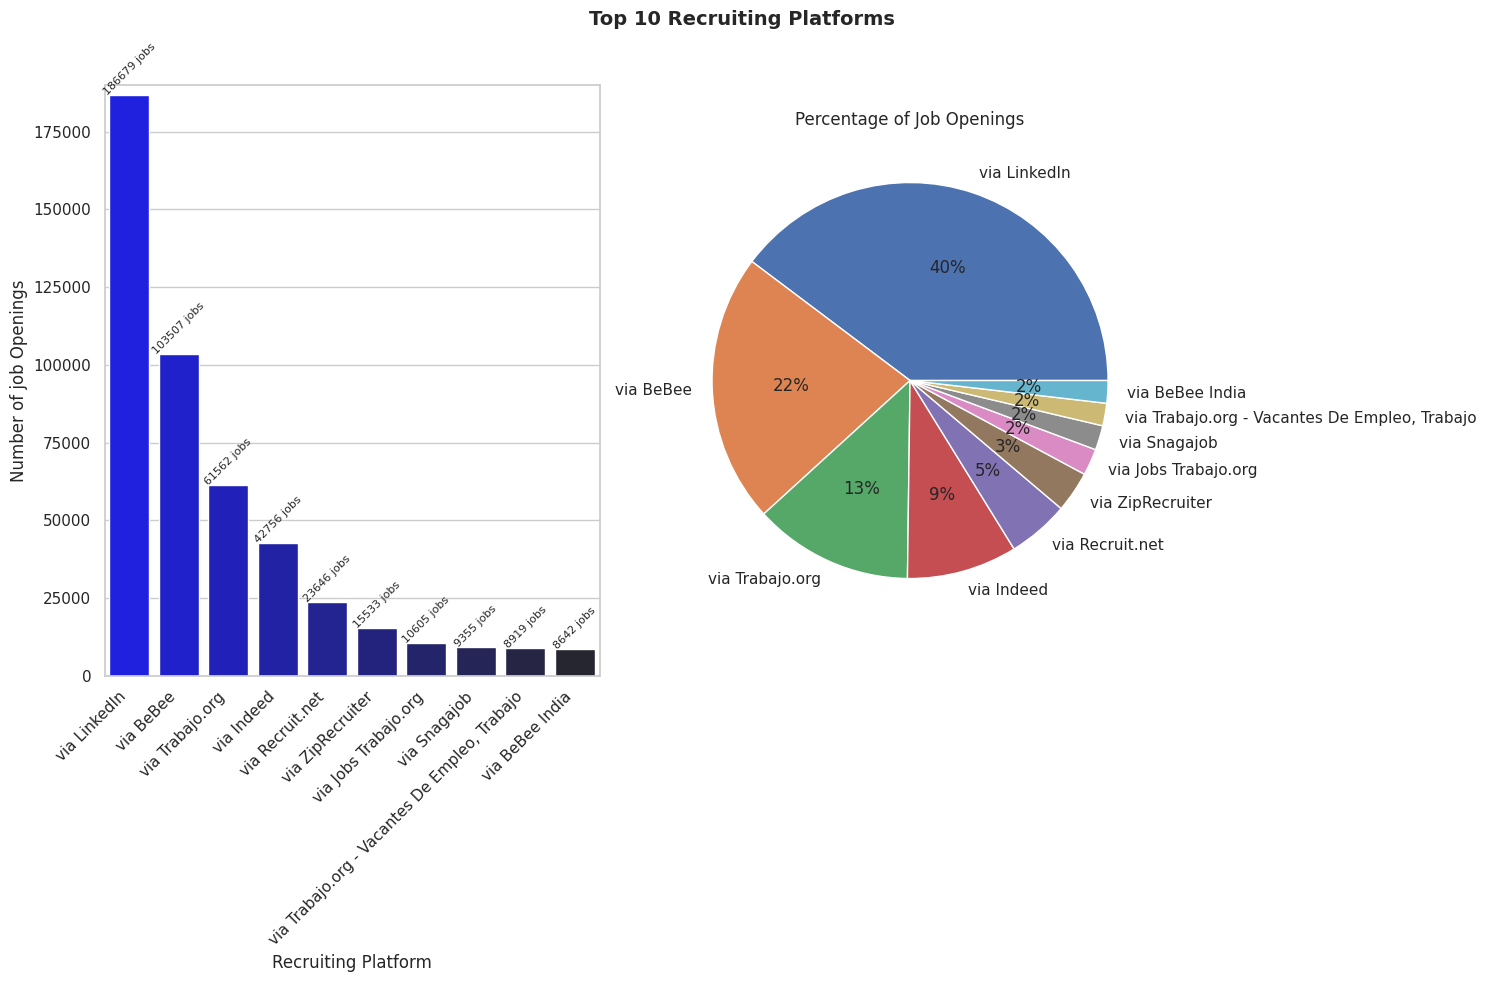

In [9]:
top_10_recruiting_platform = dataframe.copy()
top_10_recruiting_platform = top_10_recruiting_platform.groupby('job_via').agg(job_opening=('job_title_short','count'),avg_salary=('salary_year_avg','median')).sort_values(ascending=False,by='job_opening').head(10)
top_10_recruiting_platform = top_10_recruiting_platform.fillna(top_10_recruiting_platform['avg_salary'].median())
top_10_recruiting_platform['percentage'] = ((top_10_recruiting_platform['job_opening'] / int(dataframe['job_via'].value_counts().sum())) * 100).round(1)

fig, ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Top 10 Recruiting Platforms',fontweight='bold',fontsize=14)
sns.barplot(data=top_10_recruiting_platform,x='job_via',y='job_opening',hue='job_via',palette='dark:blue_r',legend=False,ax=ax[0])
top_10_recruiting_platform['percentage'].plot(kind='pie',autopct="%0.0f%%",ax=ax[1])
ax[0].set_ylim(0,190_000)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_ylabel('Number of job Openings')
ax[0].set_xlabel('Recruiting Platform')
ax[1].set_ylabel('')
ax[1].set_title('Percentage of Job Openings')
for i,text in enumerate(top_10_recruiting_platform['job_opening']):
    ax[0].text(i,top_10_recruiting_platform['job_opening'][i],f"{text} jobs",ha='center',fontsize=8,rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_170602/3644486313.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i,top_10_hiring_companies['job_opening'][i],f"{text} jobs",ha='center',fontsize=8)


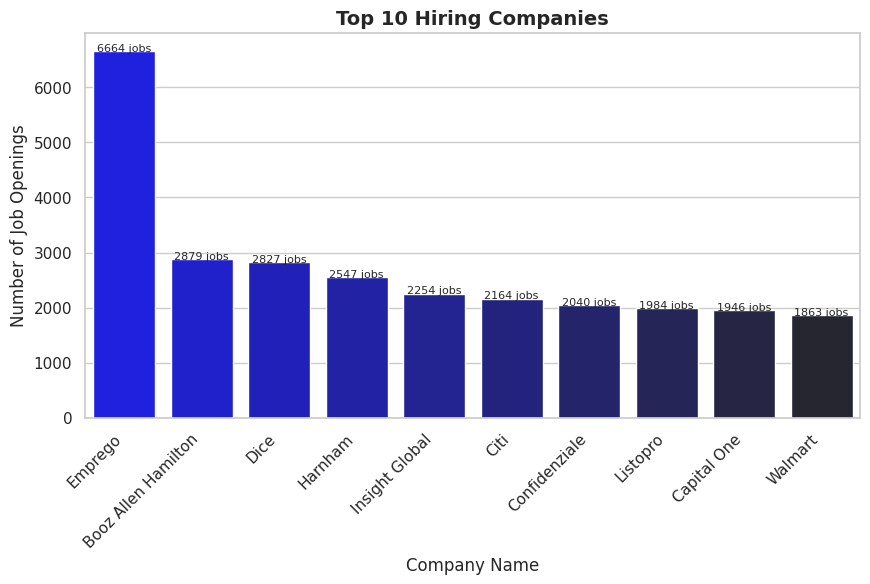

In [10]:
top_10_hiring_companies = dataframe.copy()
top_10_hiring_companies = top_10_hiring_companies.groupby('company_name').agg(job_opening=('job_title_short','count'),avg_salary=('salary_year_avg','median')).sort_values(ascending=False,by='job_opening').head(10)
top_10_hiring_companies = top_10_hiring_companies.fillna(top_10_hiring_companies['avg_salary'].median())

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=top_10_hiring_companies,x='company_name',y='job_opening',hue='company_name',palette='dark:blue_r',legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Job Openings')
plt.xlabel('Company Name')
plt.title('Top 10 Hiring Companies',fontweight='bold',fontsize=14)
for i,text in enumerate(top_10_hiring_companies['job_opening']):
    ax.text(i,top_10_hiring_companies['job_opening'][i],f"{text} jobs",ha='center',fontsize=8)


/tmp/ipykernel_170602/334399269.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, top_10_highest_paying_companies['avg_salary'][i], f"{text} jobs", ha='center', fontsize=8)


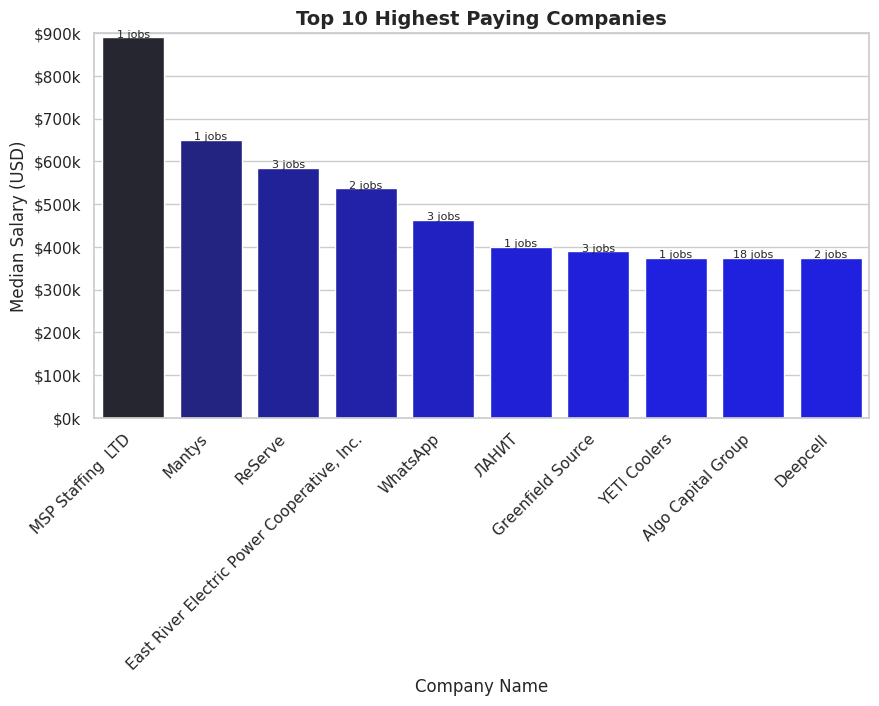

In [11]:
top_10_highest_paying_companies = dataframe.copy()
top_10_highest_paying_companies = top_10_highest_paying_companies.groupby('company_name').agg(job_openining=('job_title_short','size'),avg_salary=('salary_year_avg','median')).sort_values(by='avg_salary',ascending=False).head(10)
top_10_highest_paying_companies

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=top_10_highest_paying_companies,x='company_name',y='avg_salary',hue='avg_salary',palette='dark:blue_r',legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Median Salary (USD)')
plt.xlabel('Company Name')
plt.title('Top 10 Highest Paying Companies',fontweight='bold',fontsize=14)
ax.set_ylim(0,9000_00)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}k'))
for i, text in enumerate(top_10_highest_paying_companies['job_openining']):
    ax.text(i, top_10_highest_paying_companies['avg_salary'][i], f"{text} jobs", ha='center', fontsize=8)

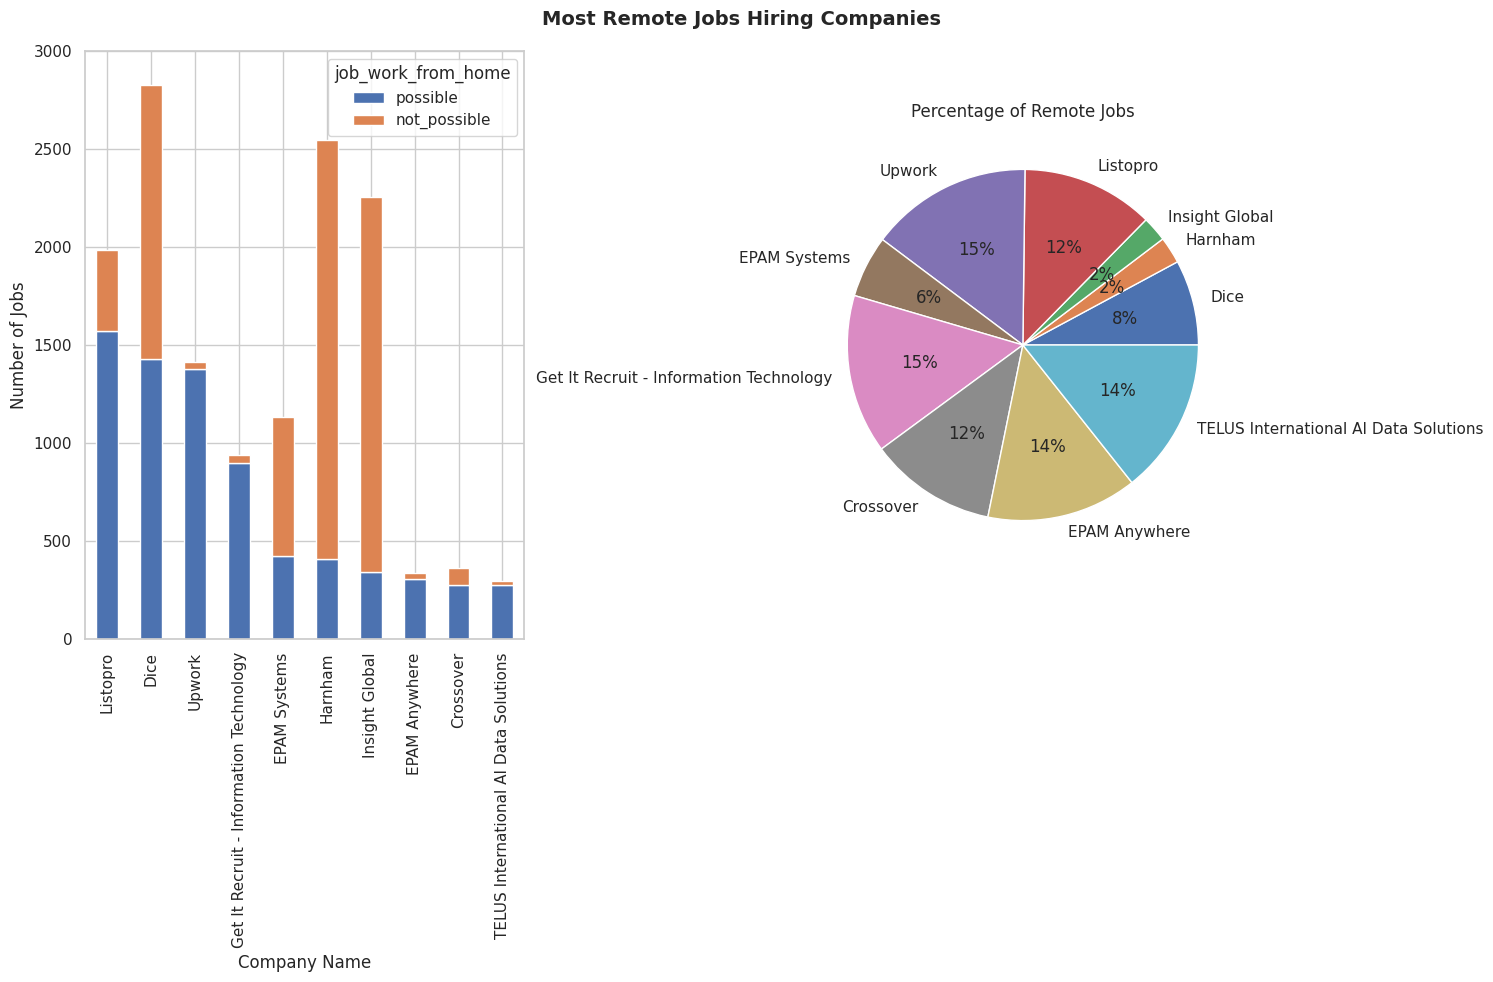

In [12]:
most_remote_jobs_hiring_companies = dataframe.copy()
most_remote_jobs_hiring_companies = most_remote_jobs_hiring_companies.pivot_table(index='company_name',columns='job_work_from_home',aggfunc='size').sort_values(by=True,ascending=False).head(10)
most_remote_jobs_hiring_companies['job_count'] = most_remote_jobs_hiring_companies[True] + most_remote_jobs_hiring_companies[False]
most_remote_jobs_hiring_companies = most_remote_jobs_hiring_companies.sort_values(by='job_count',ascending=False)
most_remote_jobs_hiring_companies['percentage'] = (most_remote_jobs_hiring_companies[True] / most_remote_jobs_hiring_companies['job_count'] * 100).round()
most_remote_jobs_hiring_companies['not_possible'] = most_remote_jobs_hiring_companies[False]
most_remote_jobs_hiring_companies['possible'] = most_remote_jobs_hiring_companies[True]
most_remote_jobs_hiring_companies.drop(columns=[True,False],inplace=True)


fig, ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Most Remote Jobs Hiring Companies',fontweight='bold',fontsize=14)
most_remote_jobs_hiring_companies[['possible','not_possible']].sort_values(by='possible',ascending=False).plot(kind='bar',stacked=True,ax=ax[0])
most_remote_jobs_hiring_companies['percentage'].plot(kind='pie',autopct="%0.0f%%",ax=ax[1])
ax[0].set_ylabel('Number of Jobs')
ax[0].set_xlabel('Company Name')
ax[0].set_ylim(0,3000)
ax[1].set_ylabel('')
ax[1].set_title('Percentage of Remote Jobs')
plt.tight_layout()
plt.show()

/tmp/ipykernel_170602/170291945.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, contract_type['count'][i], f"{text}%", ha='center', fontsize=10)


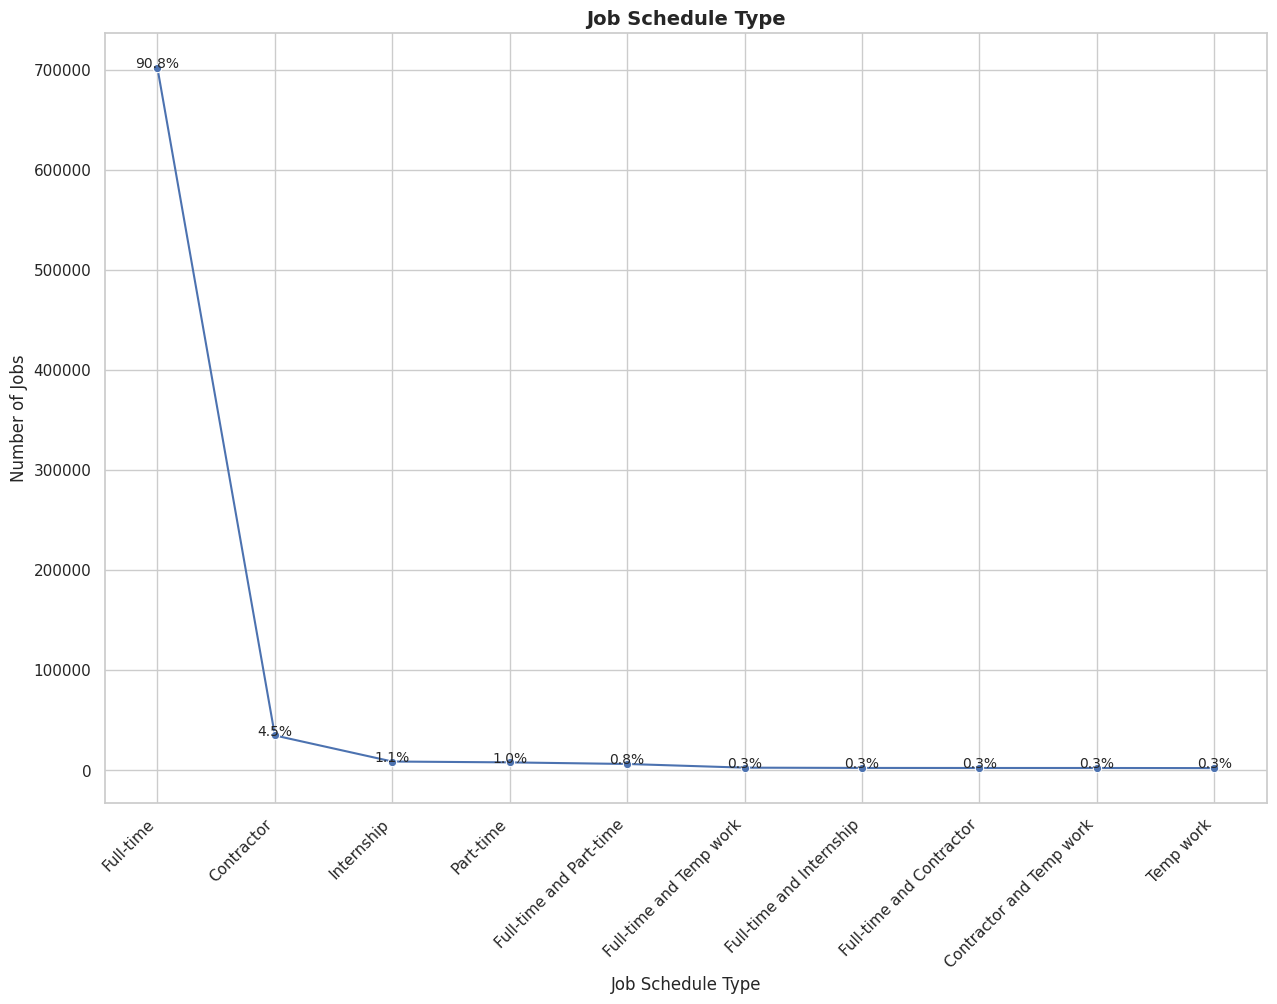

In [13]:
contract_type = dataframe.copy()
contract_type = contract_type.groupby('job_schedule_type').agg(count=('job_schedule_type','count')).sort_values(by='count',ascending=False)
contract_type['percentage'] = ((contract_type['count'] / int(contract_type['count'].sum())) * 100 ).round(1) 

fig, ax = plt.subplots(figsize=(15,10))
plt.title('Job Schedule Type',fontweight='bold',fontsize=14)
plt.xlabel('Job Schedule Type')
plt.ylabel('Number of Jobs')
sns.set_theme(context='notebook')
sns.lineplot(data=contract_type.head(10),x='job_schedule_type',y='count',marker='o',ax=ax)
plt.xticks(rotation=45, ha='right')
texts = []
for i, text in enumerate(contract_type['percentage'].head(10)):
    ax.text(i, contract_type['count'][i], f"{text}%", ha='center', fontsize=10)
    texts.append(text)

In [14]:
exploded_df_skills = dataframe.copy()   
exploded_df_skills['job_skills'] = exploded_df_skills['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)
exploded_df_skills = exploded_df_skills.explode('job_skills')

In [15]:
top_10_on_demand_skills = exploded_df_skills.groupby('job_skills').agg(count=('job_skills','count'),avg_salary=('salary_year_avg','median')).sort_values(by='count',ascending=False).head(10)
top_10_paid_skills = exploded_df_skills.groupby('job_skills').agg(count=('job_skills','count'),avg_salary=('salary_year_avg','median')).sort_values(by='avg_salary',ascending=False).head(10)

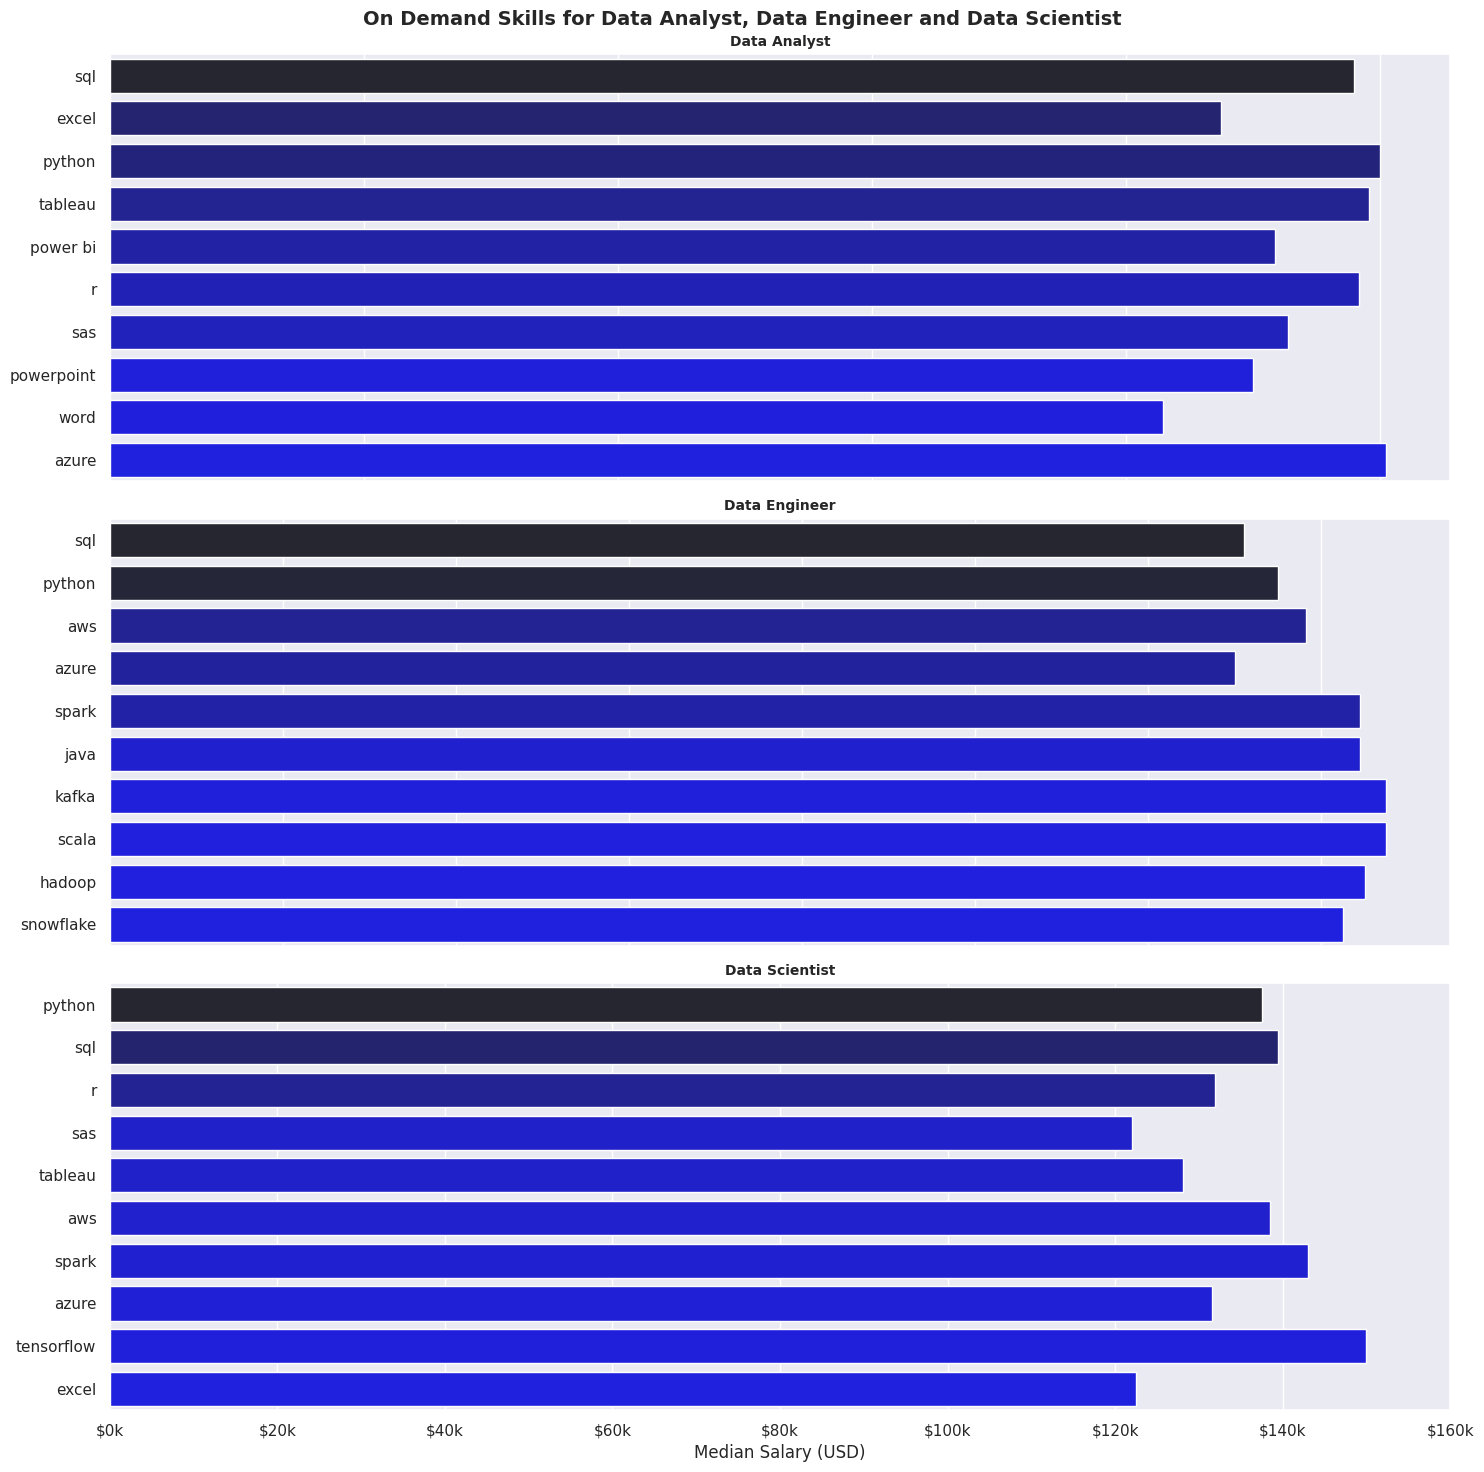

In [ ]:
data_analytics = ['Data Analyst','Senior Data Analyst']
data_engineering = ['Data Engineer','Senior Data Engineer']
data_science = ['Data Scientist','Senior Data Scientist']
data_analyst_jobs = dataframe[dataframe['job_title_short'].isin(data_analytics)]
data_engineer_jobs = dataframe[dataframe['job_title_short'].isin(data_engineering)]
data_scientist_jobs = dataframe[dataframe['job_title_short'].isin(data_science)]
data_analyst_on_demand_skills = data_analyst_jobs.copy()
data_analyst_on_demand_skills['job_skills'] = data_analyst_on_demand_skills['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)
data_analyst_on_demand_skills = data_analyst_on_demand_skills.explode('job_skills')
data_engineer_on_demand_skills = data_engineer_jobs.copy()
data_engineer_on_demand_skills['job_skills'] = data_engineer_on_demand_skills['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)  
data_engineer_on_demand_skills = data_engineer_on_demand_skills.explode('job_skills')
data_scientist_on_demand_skills = data_scientist_jobs.copy()
data_scientist_on_demand_skills['job_skills'] = data_scientist_on_demand_skills['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)    
data_scientist_on_demand_skills = data_scientist_on_demand_skills.explode('job_skills')
data_analyst_on_demand_skills = data_analyst_on_demand_skills.groupby('job_skills').agg(count=('job_skills','count'),avg_sal=('salary_year_avg','median')).sort_values(by='count',ascending=False).head(10) 
data_engineer_on_demand_skills = data_engineer_on_demand_skills.groupby('job_skills').agg(count=('job_skills','count'),avg_sal=('salary_year_avg','median')).sort_values(by='count',ascending=False).head(10)
data_scientist_on_demand_skills = data_scientist_on_demand_skills.groupby('job_skills').agg(count=('job_skills','count'),avg_sal=('salary_year_avg','median')).sort_values(by='count',ascending=False).head(10) 


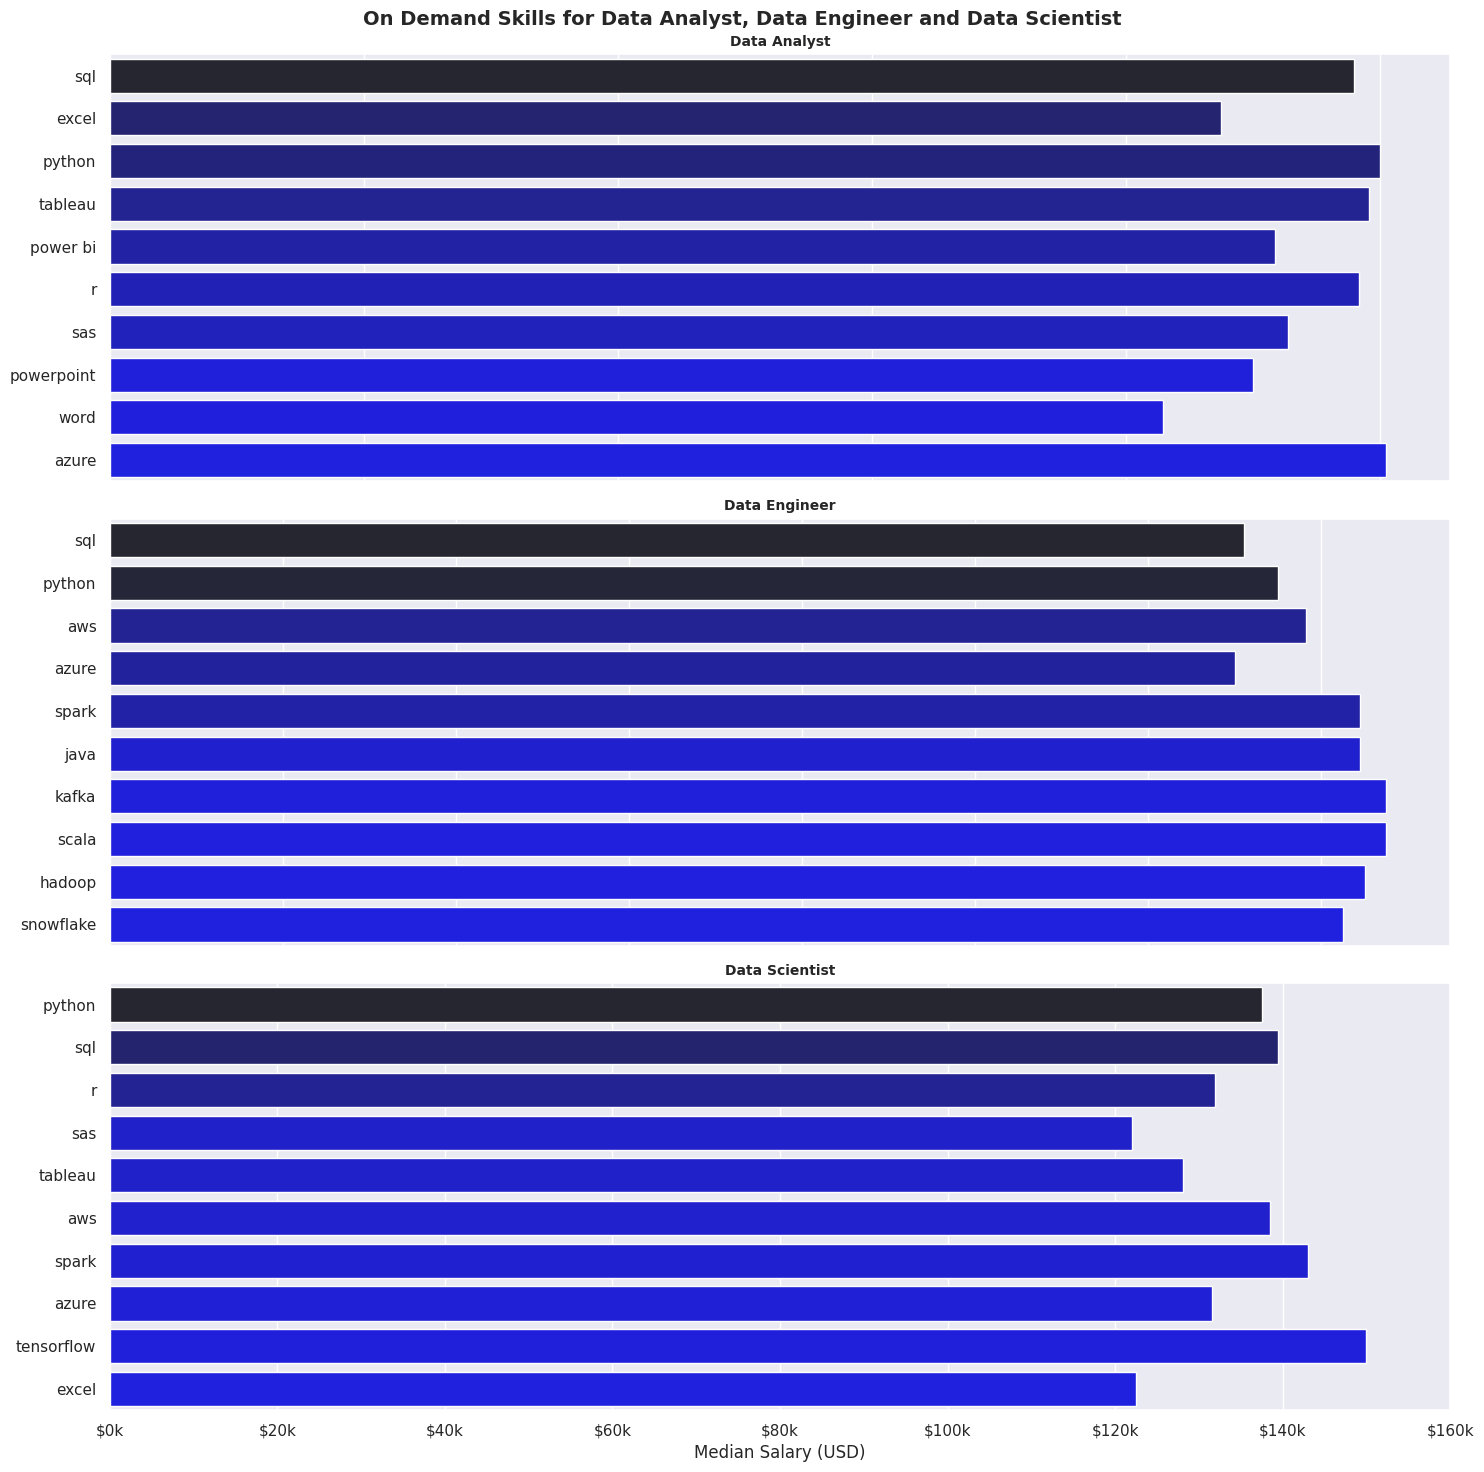

In [39]:
fig, ax = plt.subplots(3,1,figsize=(15,15))
fig.suptitle('On Demand Skills for Data Analyst, Data Engineer and Data Scientist',fontweight='bold',fontsize=14)
sns.barplot(data=data_analyst_on_demand_skills,x='avg_sal',y='job_skills',hue='count',palette='dark:blue_r',legend=False,ax=ax[0],orient='h')
sns.barplot(data=data_engineer_on_demand_skills,x='avg_sal',y='job_skills',hue='count',palette='dark:blue_r',legend=False,ax=ax[1],orient='h')
sns.barplot(data=data_scientist_on_demand_skills,x='avg_sal',y='job_skills',hue='count',palette='dark:blue_r',legend=False,ax=ax[2],orient='h')
for i in range(3):
    ax[i].set_title(['Data Analyst','Data Engineer','Data Scientist'][i],fontweight='bold',fontsize=10)
    ax[i].set_ylabel('')
    if i!=2:
        ax[i].set_xlabel('')
        ax[i].set_xticklabels([])
    else:
        ax[i].set_xlabel('Median Salary (USD)')
        ax[i].set_xlim(0,160000)
        ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}k'))
plt.tight_layout()

In [18]:
new_df = dataframe.copy()
new_df['job_posted_date'] = pd.to_datetime(new_df['job_posted_date'])
new_df['month_no'] = new_df['job_posted_date'].dt.month
new_df['month'] = new_df['job_posted_date'].dt.month_name()
new_df.sort_values(by='month_no',inplace=True)
new_df['job_skills'] = new_df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)
new_df = new_df.explode('job_skills')


In [19]:
skills_demand_by_month = new_df.pivot_table(index='month_no', columns='job_skills', aggfunc='size')
skills_demand_by_month.loc['total'] = skills_demand_by_month.sum()
top_10_skills = skills_demand_by_month.loc['total'].nlargest(10).index
skills_demand_by_month = skills_demand_by_month[top_10_skills]
skills_demand_by_month = skills_demand_by_month.sort_values(by='total', axis=1, ascending=False)
skills_demand_by_month = skills_demand_by_month.drop('total',axis=0)
skills_demand_by_month['month'] = pd.to_datetime(skills_demand_by_month.index, format='%m').month_name()
skills_demand_by_month.set_index('month',inplace=True)
skills_demand_by_month

job_skills,sql,python,aws,azure,r,tableau,excel,spark,power bi,java
month,,,,,,,,,,
January,45774.0,44889.0,16805.0,15385.0,16351.0,14805.0,15087.0,14304.0,10660.0,10447.0
February,32720.0,31943.0,12219.0,11114.0,11288.0,11008.0,10732.0,10170.0,8033.0,7507.0
March,32282.0,31990.0,12458.0,11152.0,11358.0,10870.0,10546.0,9994.0,7868.0,7649.0
April,31096.0,30482.0,11635.0,10557.0,10647.0,10430.0,10562.0,9234.0,7792.0,7294.0
May,27096.0,26908.0,10394.0,9111.0,9339.0,9236.0,8477.0,8278.0,6869.0,6004.0
June,31671.0,31216.0,11759.0,10793.0,10820.0,10575.0,10397.0,9729.0,8286.0,6886.0
July,31869.0,31257.0,12017.0,10960.0,10793.0,10758.0,10301.0,9085.0,8500.0,6818.0
August,36699.0,36228.0,13817.0,12193.0,13037.0,12497.0,12563.0,10533.0,9450.0,7937.0
September,28926.0,28616.0,10934.0,10221.0,9248.0,9344.0,9649.0,8383.0,7764.0,6120.0


In [20]:
skills_demand_by_month_percentage = (skills_demand_by_month.div(skills_demand_by_month.sum(axis=1), axis=0) * 100).round(1)
skills_demand_by_month_percentage

job_skills,sql,python,aws,azure,r,tableau,excel,spark,power bi,java
month,,,,,,,,,,
January,22.4,21.9,8.2,7.5,8.0,7.2,7.4,7.0,5.2,5.1
February,22.3,21.8,8.3,7.6,7.7,7.5,7.3,6.9,5.5,5.1
March,22.1,21.9,8.5,7.6,7.8,7.4,7.2,6.8,5.4,5.2
April,22.3,21.8,8.3,7.6,7.6,7.5,7.6,6.6,5.6,5.2
May,22.3,22.1,8.5,7.5,7.7,7.6,7.0,6.8,5.6,4.9
June,22.3,22.0,8.3,7.6,7.6,7.4,7.3,6.8,5.8,4.8
July,22.4,22.0,8.4,7.7,7.6,7.6,7.2,6.4,6.0,4.8
August,22.2,22.0,8.4,7.4,7.9,7.6,7.6,6.4,5.7,4.8
September,22.4,22.1,8.5,7.9,7.2,7.2,7.5,6.5,6.0,4.7


/tmp/ipykernel_170602/2330126300.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(skills_demand_by_month.index,rotation=45,ha='right')
/tmp/ipykernel_170602/2330126300.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(skills_demand_by_month.index,rotation=45,ha='right')


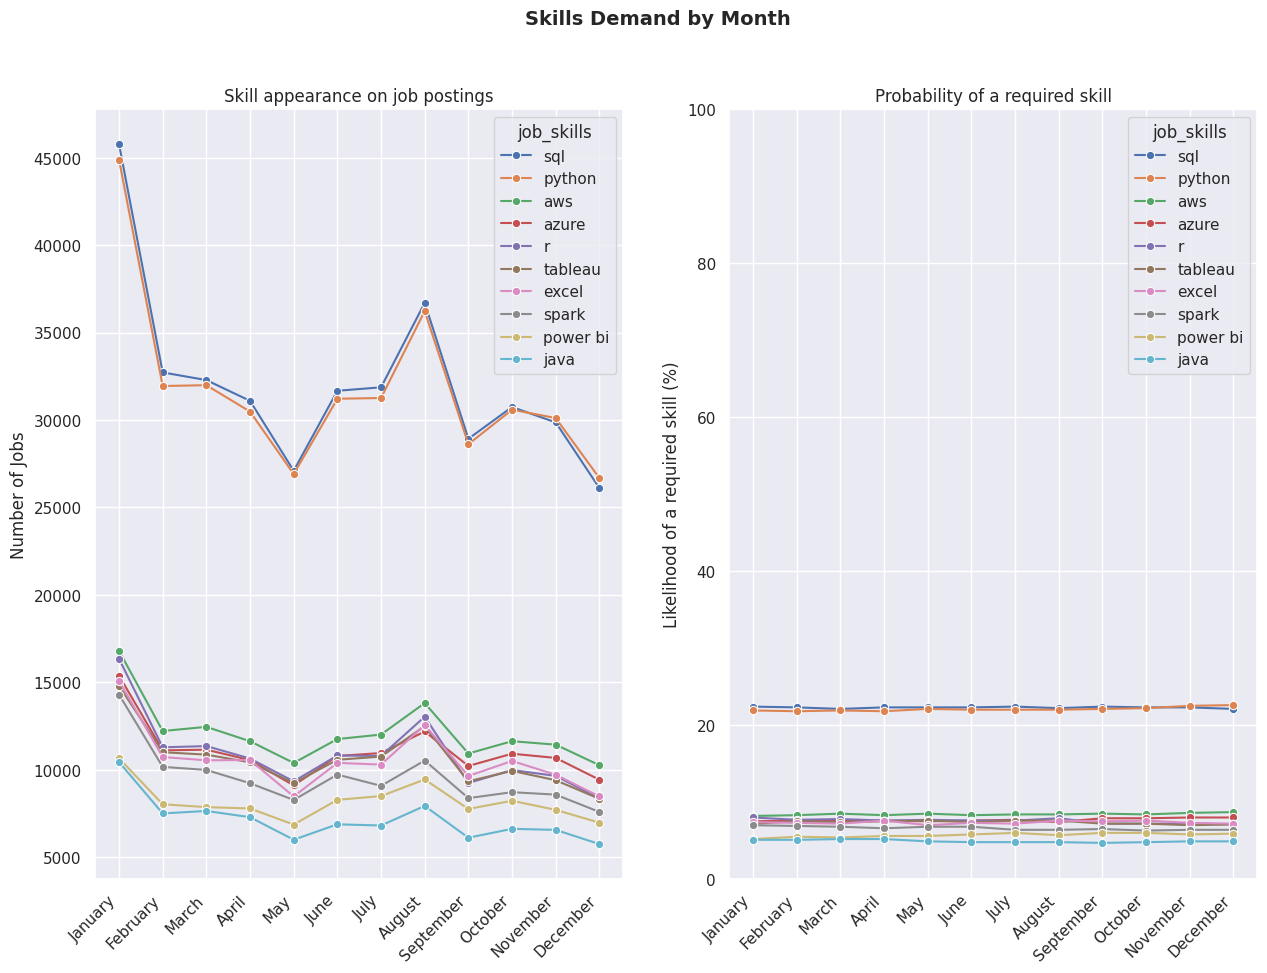

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Skills Demand by Month',fontweight='bold',fontsize=14)
sns.lineplot(data=skills_demand_by_month,ax=ax[0],marker='o',dashes=False)
sns.lineplot(data=skills_demand_by_month_percentage,ax=ax[1],marker='o',dashes=False)
ax[0].set_title('Skill appearance on job postings')
ax[1].set_title('Probability of a required skill')
for i in range(2):
    ax[i].set_xticklabels(skills_demand_by_month.index,rotation=45,ha='right')
    ax[i].set_ylabel('Number of Jobs')
    ax[i].set_xlabel('')
    if i==1:
        ax[i].set_ylabel('Likelihood of a required skill (%)')
        ax[i].set_ylim(0,100)


In [22]:
certificate_required_jobs = dataframe.copy()
certificate_required_jobs =  certificate_required_jobs.pivot_table(index='job_title_short',columns='job_no_degree_mention',aggfunc='size')
certificate_required_jobs['required'] = certificate_required_jobs[False]
certificate_required_jobs['not_required'] = certificate_required_jobs[True]
certificate_required_jobs.drop(columns=[True,False],inplace=True)
certificate_required_jobs.loc['total'] = certificate_required_jobs.sum()
certificate_required_jobs['percentage'] = ((certificate_required_jobs['required']) / (certificate_required_jobs['required'] + certificate_required_jobs['not_required'])*100).round(1)
certificate_required_jobs


job_no_degree_mention,required,not_required,percentage
job_title_short,,,
Business Analyst,36123,12940,73.6
Cloud Engineer,6431,5900,52.2
Data Analyst,120243,75832,61.3
Data Engineer,105213,81028,56.5
Data Scientist,161907,10379,94.0
Machine Learning Engineer,13066,1014,92.8
Senior Data Analyst,18616,10600,63.7
Senior Data Engineer,25259,19304,56.7
Senior Data Scientist,34807,2150,94.2


In [23]:
jobs_offer_health_insurance = dataframe.copy()
jobs_offer_health_insurance = jobs_offer_health_insurance.pivot_table(index='job_title_short',columns='job_health_insurance',aggfunc='size')
jobs_offer_health_insurance['offered'] = jobs_offer_health_insurance[True]
jobs_offer_health_insurance['not_offered'] = jobs_offer_health_insurance[False]
jobs_offer_health_insurance.drop(columns=[True,False],inplace=True)
jobs_offer_health_insurance.loc['total'] = jobs_offer_health_insurance.sum()
jobs_offer_health_insurance['percentage'] = ((jobs_offer_health_insurance['offered']) / (jobs_offer_health_insurance['offered'] + jobs_offer_health_insurance['not_offered']) * 100).round(1)
jobs_offer_health_insurance

job_health_insurance,offered,not_offered,percentage
job_title_short,,,
Business Analyst,2916,46147,5.9
Cloud Engineer,164,12167,1.3
Data Analyst,24724,171351,12.6
Data Engineer,14009,172232,7.5
Data Scientist,26251,146035,15.2
Machine Learning Engineer,396,13684,2.8
Senior Data Analyst,5305,23911,18.2
Senior Data Engineer,5082,39481,11.4
Senior Data Scientist,6808,30149,18.4


In [24]:
remote_jobs_percentage = dataframe.copy() 
remote_jobs_percentage = remote_jobs_percentage.pivot_table(index='job_title_short',columns='job_work_from_home',aggfunc='size')
remote_jobs_percentage['on-site'] = remote_jobs_percentage[False]
remote_jobs_percentage['remote'] = remote_jobs_percentage[True]
remote_jobs_percentage.drop(columns=[True,False],inplace=True)
remote_jobs_percentage.loc['total'] = remote_jobs_percentage.sum()
remote_jobs_percentage['percentage'] = ((remote_jobs_percentage['remote']) / (remote_jobs_percentage['on-site'] + remote_jobs_percentage['remote']) * 100).round(1)
remote_jobs_percentage

job_work_from_home,on-site,remote,percentage
job_title_short,,,
Business Analyst,46274,2789,5.7
Cloud Engineer,11760,571,4.6
Data Analyst,182749,13326,6.8
Data Engineer,165030,21211,11.4
Data Scientist,157751,14535,8.4
Machine Learning Engineer,12592,1488,10.6
Senior Data Analyst,26872,2344,8.0
Senior Data Engineer,38004,6559,14.7
Senior Data Scientist,33158,3799,10.3


In [25]:
certificate_required_jobs

job_no_degree_mention,required,not_required,percentage
job_title_short,,,
Business Analyst,36123,12940,73.6
Cloud Engineer,6431,5900,52.2
Data Analyst,120243,75832,61.3
Data Engineer,105213,81028,56.5
Data Scientist,161907,10379,94.0
Machine Learning Engineer,13066,1014,92.8
Senior Data Analyst,18616,10600,63.7
Senior Data Engineer,25259,19304,56.7
Senior Data Scientist,34807,2150,94.2


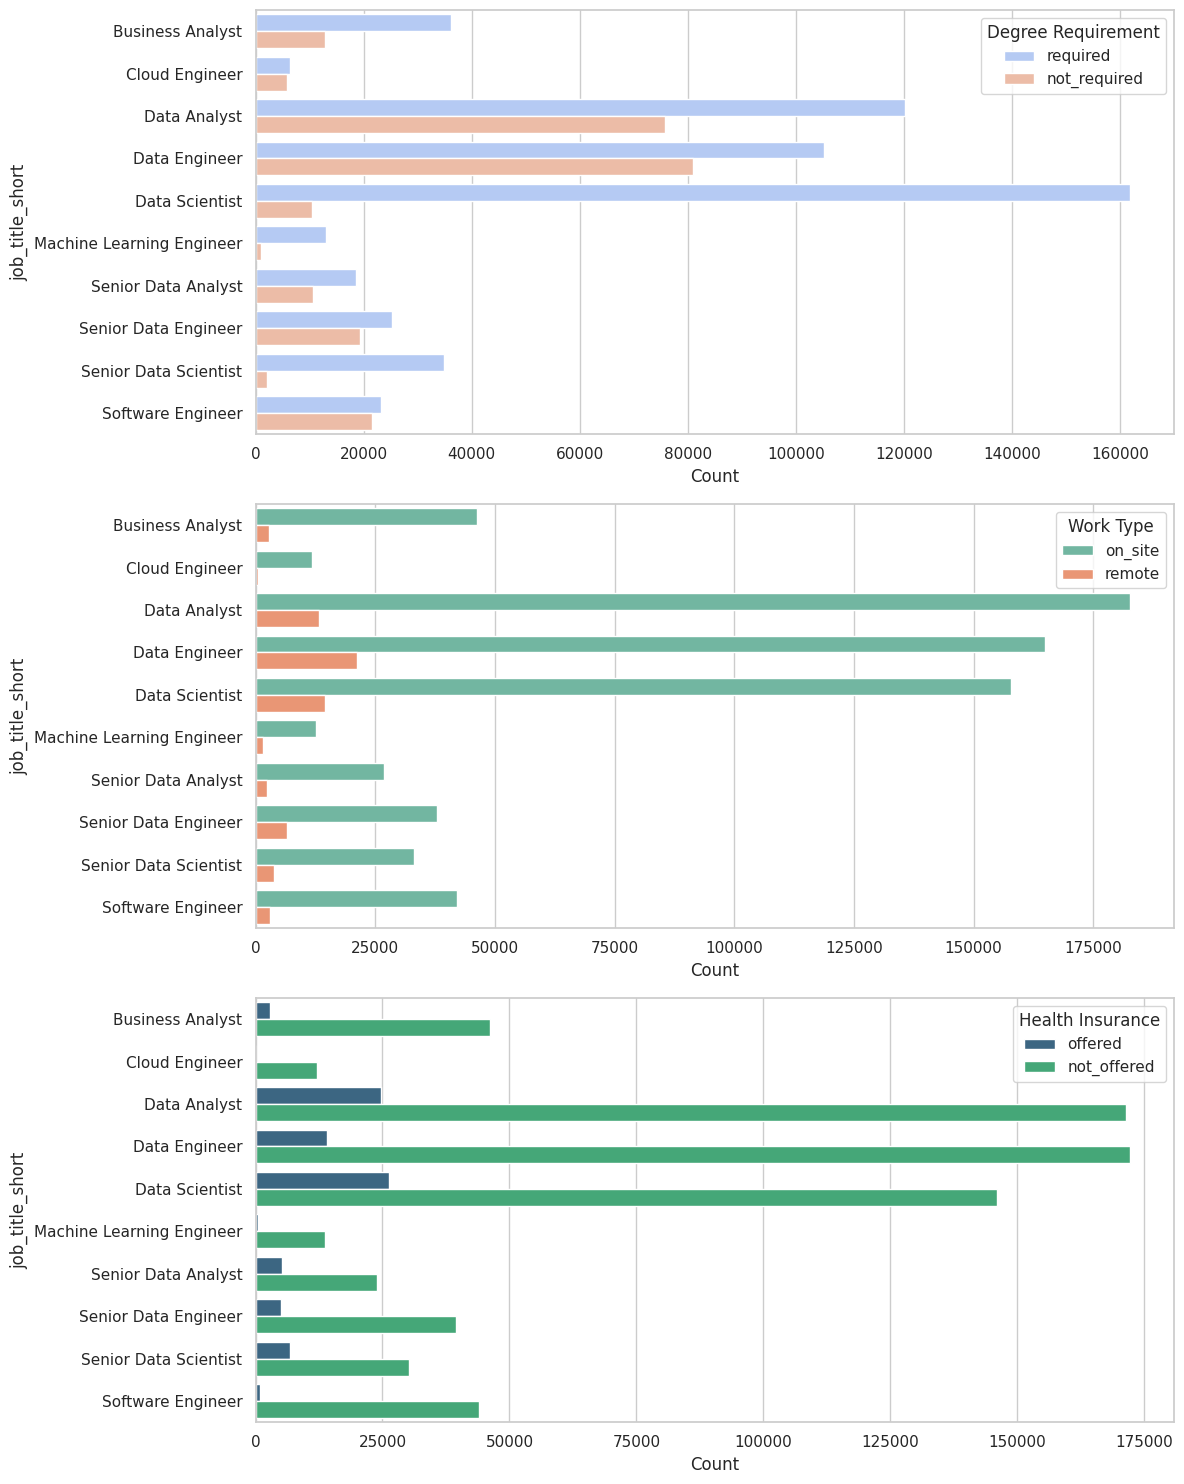

In [26]:
# Sample Data (Replace with your actual DataFrames)
job_degree = pd.DataFrame({
    'job_title_short': ['Business Analyst', 'Cloud Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist', 
                        'Machine Learning Engineer', 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist', 'Software Engineer'],
    'required': [36123, 6431, 120243, 105213, 161907, 13066, 18616, 25259, 34807, 23300] ,
    'not_required': [12940, 5900, 75832, 81028, 10379, 1014, 10600, 19304, 2150, 21629]
    
})

job_remote = pd.DataFrame({
    'job_title_short': ['Business Analyst', 'Cloud Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist', 
                        'Machine Learning Engineer', 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist', 'Software Engineer'],
    'on_site': [46274, 11760, 182749, 165030, 157751, 12592, 26872, 38004, 33158, 41999],
    'remote': [2789, 571, 13326, 21211, 14535, 1488, 2344, 6559, 3799, 2930]
})

job_insurance = pd.DataFrame({
    'job_title_short': ['Business Analyst', 'Cloud Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist', 
                        'Machine Learning Engineer', 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist', 'Software Engineer'],
    'offered': [2916, 164, 24724, 14009, 26251, 396, 5305, 5082, 6808, 842],
    'not_offered': [46147, 12167, 171351, 172232, 146035, 13684, 23911, 39481, 30149, 44087]
})

# Set style
sns.set(style="whitegrid")

fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# 1️⃣ Degree Requirement Plot (Grouped Bar Chart)
job_degree_melted = job_degree.melt(id_vars=['job_title_short'], var_name='Degree Requirement', value_name='Count')
sns.barplot(data=job_degree_melted, x='Count', y='job_title_short', hue='Degree Requirement', ax=ax[0], palette='coolwarm')
ax[0].set_title('📜 Job Degree Requirement (Required vs Not Required)', fontsize=14, fontweight='bold')

# 2️⃣ Remote vs On-Site Jobs (Stacked Bar Chart)
job_remote_melted = job_remote.melt(id_vars=['job_title_short'], var_name='Work Type', value_name='Count')
sns.barplot(data=job_remote_melted, x='Count', y='job_title_short', hue='Work Type', ax=ax[1], palette='Set2')
ax[1].set_title('🏡 Remote vs On-Site Jobs', fontsize=14, fontweight='bold')

# 3️⃣ Health Insurance (Grouped Bar Chart)
job_insurance_melted = job_insurance.melt(id_vars=['job_title_short'], var_name='Health Insurance', value_name='Count')
sns.barplot(data=job_insurance_melted, x='Count', y='job_title_short', hue='Health Insurance', ax=ax[2], palette='viridis')
ax[2].set_title('🏥 Jobs Offering Health Insurance', fontsize=14, fontweight='bold')
for i in range(3):
    ax[i].set_title('')

# Final adjustments
plt.tight_layout()
plt.show()


In [27]:
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", 
    "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", 
    "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", 
    "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", 
    "Vietnam", "Yemen", "Hong Kong", "Taiwan", "Guam", "Northern Mariana Islands"
]

north_america_countries = [
    "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", 
    "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", 
    "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", 
    "Trinidad and Tobago", "United States", "Puerto Rico", "U.S. Virgin Islands	", "U.S. Virgin Islands","Guadeloupe",
    "Cayman Islands", "Curaçao"
]

south_america_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", 
    "Suriname", "Uruguay", "Venezuela"
]

europe_countries = [
    "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", 
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", 
    "Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", 
    "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", 
    "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", 
    "United Kingdom", "Vatican City", "Czechia", "Macedonia (FYROM)"
]

africa_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", 
    "Chad", "Comoros", "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", 
    "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", 
    "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", 
    "Nigeria", "Republic of the Congo", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", 
    "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe",
    "Côte d'Ivoire", "Réunion", "Sierra Leone", "Congo, Democratic Republic of the", "Western Sahara"
]

australia_countries = [
    "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau", 
    "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
]


In [28]:
def continent_col(row):
    country = row['job_country'] if row['job_country'] not in [None, "Unknown", ""] else row['search_location']
    
    if country in africa_countries:
        return 'Africa'
    elif country in asian_countries:
        return 'Asia'
    elif country in north_america_countries:
        return "North America"
    elif country in south_america_countries:
        return "South America"
    elif country in europe_countries:
        return "Europe"
    elif country in australia_countries:
        return "Australia"
    else:
        return "Unknown"  
    
new_df['continent'] = new_df.apply(continent_col, axis=1)

In [29]:
dataframe['continent'] = dataframe.apply(continent_col, axis=1)

In [30]:
dataframe[dataframe['continent']=='Unknown']['search_location'].unique()

array([], dtype=object)

In [41]:
jobs_by_continent = dataframe.groupby('continent').agg(count=('job_title_short','size'),avg_sal=('salary_year_avg','median')).sort_values(by='count',ascending=False)
jobs_by_continent = jobs_by_continent.reset_index()

jobs_by_continent


,continent,count,avg_sal
0,Europe,289145,98301.5
1,North America,270164,120000.0
2,Asia,148476,98283.0
3,South America,40114,101764.5
4,Africa,22406,96773.0
5,Australia,15436,110500.0


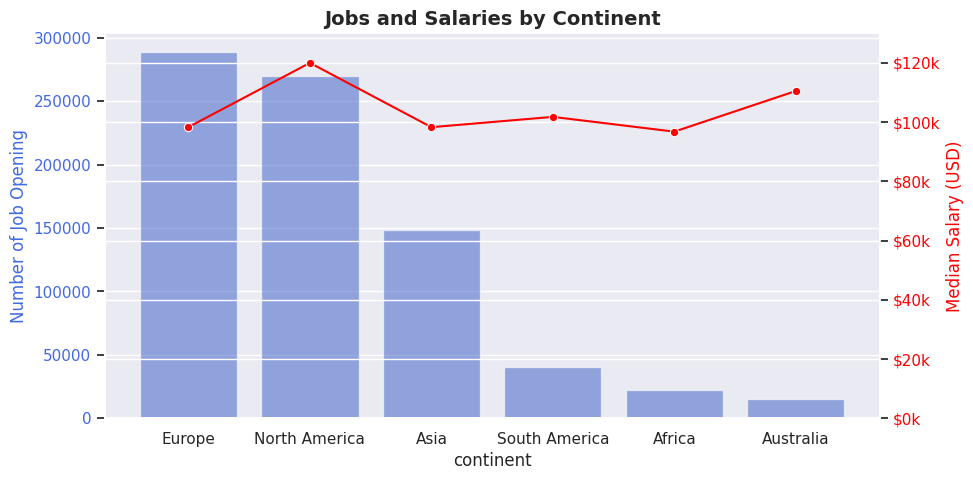

In [42]:
sns.set_theme(context='notebook',style='darkgrid')

fig, ax1 = plt.subplots(figsize=(10, 5))

sns.barplot(data=jobs_by_continent, x='continent', y='count', ax=ax1, color='royalblue', alpha=0.6)
ax1.set_ylabel('Number of Job Opening', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()

sns.lineplot(data=jobs_by_continent, x='continent', y='avg_sal', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Median Salary (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0,13_000_0)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"${int(x/1000)}k"))

plt.title('Jobs and Salaries by Continent', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()


In [114]:
skills_by_continent = new_df.copy()
skills_by_continent = skills_by_continent.pivot_table(index='continent',columns='job_skills',aggfunc='size')
skills_by_continent.loc['total'] = skills_by_continent.sum()
skills_by_continent = skills_by_continent[skills_by_continent.loc['total'].nlargest(10).index]
skills_by_continent = skills_by_continent.drop('total',axis=0)
skills_by_continent['total'] = skills_by_continent.sum(axis=1)
skills_by_continent = skills_by_continent.sort_values(by='total',ascending=False)
skills_by_continent = skills_by_continent.drop('total',axis=1)
skills_by_continent

job_skills,sql,python,aws,azure,r,tableau,excel,spark,power bi,java
continent,,,,,,,,,,
North America,147823.0,139853.0,52646.0,40167.0,61954.0,59949.0,55888.0,41684.0,33957.0,31517.0
Europe,129238.0,138169.0,49302.0,55376.0,38176.0,34136.0,36758.0,37594.0,36875.0,27364.0
Asia,71986.0,69990.0,26750.0,23296.0,20487.0,24216.0,24042.0,25076.0,17507.0,18254.0
South America,18282.0,17909.0,8766.0,6232.0,4766.0,4566.0,5047.0,5460.0,4656.0,4239.0
Africa,10163.0,8773.0,3850.0,3581.0,3815.0,2712.0,3701.0,2738.0,3076.0,2459.0
Australia,7357.0,6215.0,4067.0,3875.0,1694.0,1634.0,1582.0,2057.0,2076.0,1779.0


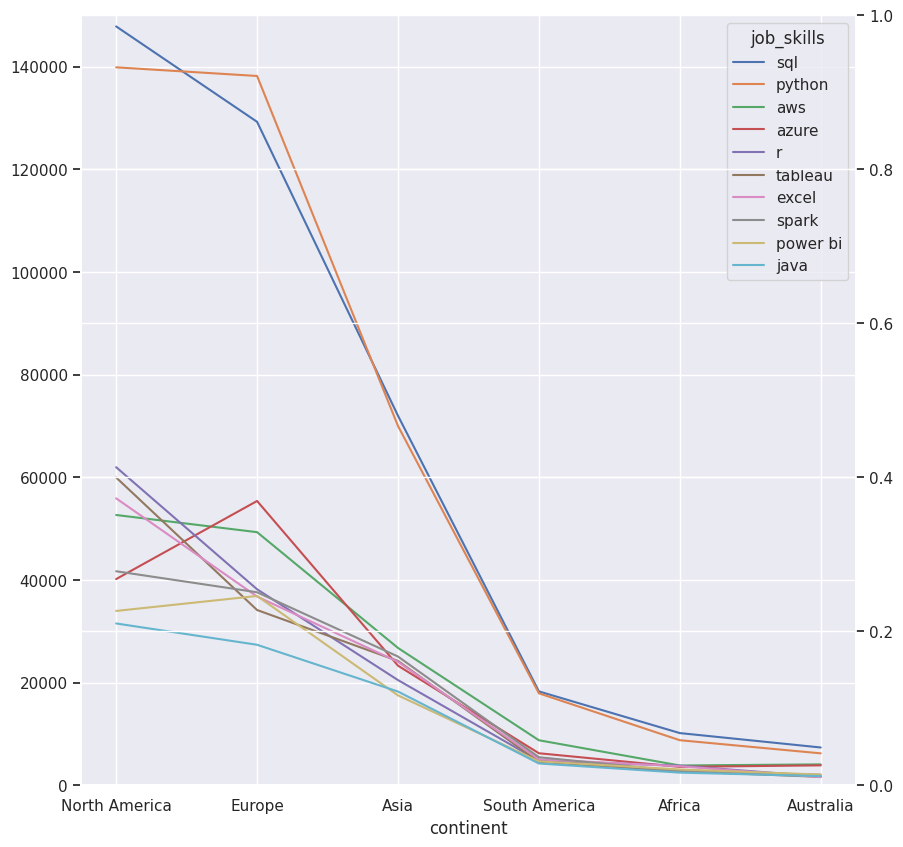

In [119]:
fig, ax1 = plt.subplots(figsize=(10,10))

sns.lineplot(data=skills_by_continent,ax=ax1,dashes=False)
ax1.set_ylim(0,150_000)

ax2 = ax1.twinx()



In [131]:
devops_tools = ['kubernetes','jenkins','terraform','bash','prometheus','docker','aws','azure']
devops_jobs = new_df[new_df['job_skills'].isin(devops_tools)]
devops_top_skills = devops_jobs.groupby('job_skills').agg(count=('job_skills','size'),avg_sal=('salary_year_avg','median'))
devops_top_skills

,count,avg_sal
job_skills,,
aws,145381,135000.0
azure,132527,125000.0
bash,9894,115000.0
docker,41715,130750.0
jenkins,19805,128453.5
kubernetes,37349,139216.0
terraform,20407,136000.0


In [166]:
devops_jobs_pivot = devops_jobs.pivot_table(index='month_no',columns='job_skills',values='salary_year_avg',aggfunc='median')
devops_jobs_pivot['month'] = pd.to_datetime(devops_jobs_pivot.index,format='%m').month_name()
devops_jobs_pivot = devops_jobs_pivot.set_index('month')
devops_jobs_pivot.loc['total'] = devops_jobs_pivot.sum(axis=0)
devops_jobs_pivot = devops_jobs_pivot[devops_jobs_pivot.loc['total'].sort_values(ascending=False).index.tolist()]
devops_jobs_pivot = devops_jobs_pivot.drop('total',axis=0)
devops_jobs_pivot

job_skills,kubernetes,terraform,aws,docker,azure,jenkins,bash
month,,,,,,,
January,145550.0,126250.0,138200.0,127390.00,131580.0,147500.0,125000.0
February,140000.0,130790.0,131900.0,137500.00,128750.0,125000.0,127500.0
March,133000.0,133500.0,135500.0,127794.50,125000.0,134241.0,115000.0
April,142500.0,135790.0,133500.0,125000.00,131560.0,122500.0,103750.0
May,147500.0,147500.0,135000.0,133870.50,125000.0,137250.0,111175.0
June,125000.0,143000.0,132500.0,125000.00,125000.0,129000.0,115000.0
July,135870.5,140000.0,134241.0,138000.00,125000.0,133250.0,125000.0
August,139100.0,133370.5,134415.0,141202.25,125000.0,134241.0,112500.0
September,140000.0,120000.0,134250.0,140000.00,125000.0,124000.0,138000.0
